In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import operator
from langdetect import detect
from googletrans import Translator

from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from pyspark.sql.functions import *
import numpy as numpy

nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandrubalan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alexandrubalan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [2]:
tweets = pd.read_csv("tweets.csv", sep = ";", error_bad_lines = False, encoding = 'utf8')
tweets = tweets.fillna(0)
tweets


,username,date,retweets,favorites,text,tokens,geo,location,mentions,hashtags,id,query,permalink,grade
0,NS_online,2017-01-17 18:21,0,0,"Oei, dat is balen Melcher! Sorry voor de verke...","['Oei', ',', 'dat', 'is', 'balen', 'Melcher', ...",0,Utrecht,0,0,821392093541240832,NS AND vertraging,https://twitter.com/NS_online/status/821392093...,1
1,Arriva_NL,2017-12-11 16:14,0,0,Ik zie dat de voorgaande rit wel heeft gereden...,"['Ik', 'zie', 'dat', 'de', 'voorgaande', 'rit'...",0,Heerenveen,0,0,940223278093864960,Arriva AND vertraging,https://twitter.com/Arriva_NL/status/940223278...,1
2,NS_online,2017-12-06 08:37,0,0,"Ah, oke! Dat was mij niet zo snel duidelijk. N...","['Ah', ',', 'oke', '!', 'Dat', 'was', 'mij', '...",0,Utrecht,0,0,938296392891629569,storingen,https://twitter.com/NS_online/status/938296392...,0
3,Nyderwin,2017-01-12 08:21,0,0,zal de trein van 38 na op tijd rijden of zal d...,"['zal', 'de', 'trein', 'van', '38', 'na', 'op'...",0,belgium,0,0,819429046970937345,vertraging AND trein,https://twitter.com/Nyderwin/status/8194290469...,0
4,RETRotterdam,2017-12-13 08:08,1,0,Actuele #RETverstoring #Bus143 Vervallen rit. ...,"['Actuele', '#', 'RETverstoring', '#', 'Bus143...",0,Rotterdam,0,#RETverstoring #Bus143,940825630022754304,Overstappen OR Omleiding OR oponthoud,https://twitter.com/RETRotterdam/status/940825...,0
5,ElsVeenis,2017-01-17 17:00,0,0,"Na heenweg naar werk vol ontberingen (kou, ver...","['Na', 'heenweg', 'naar', 'werk', 'vol', 'ontb...",0,Ministerie OCW,0,#ns,821371520564002816,NS AND vertraging,https://twitter.com/ElsVeenis/status/821371520...,1
6,LeanderrJ,2017-12-15 19:42,0,1,Na drie keer overstappen de afgelopen 4 jaar w...,"['Na', 'drie', 'keer', 'overstappen', 'de', 'a...",0,0,0,0,941725131369480192,Overstappen OR Omleiding OR oponthoud,https://twitter.com/LeanderrJ/status/941725131...,0
7,WilCornielje,2017-12-17 14:47,0,0,Ja @he_peter dat zie je goed. En vervolgens sn...,"['Ja', '@', 'he_peter', 'dat', 'zie', 'je', 'g...",0,0,@he_peter @fvdemocratie,#,942375825063731200,Overstappen OR Omleiding OR oponthoud,https://twitter.com/WilCornielje/status/942375...,0
8,bdefrens,2017-12-09 18:55,0,0,"Oh, dat is mij ook een keer gebeurd! Ik moest ...","['Oh', ',', 'dat', 'is', 'mij', 'ook', 'een', ...",0,The Netherlands,0,0,939539060896489472,vertraging AND trein,https://twitter.com/bdefrens/status/9395390608...,0
9,dillenbruil,2017-12-10 19:56,0,0,Zelfde probleem overigens. Planner zegt dat he...,"['Zelfde', 'probleem', 'overigens', '.', 'Plan...",0,"Zutphen, Nederland",0,0,939916735334973442,storingen,https://twitter.com/dillenbruil/status/9399167...,1


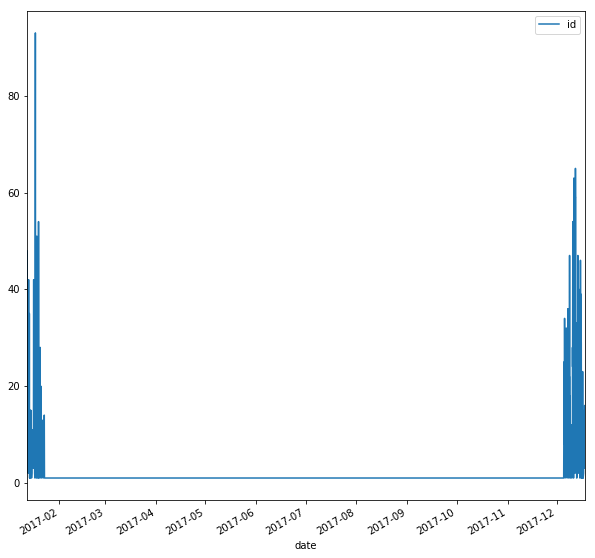

In [22]:
tweets["date"] = pd.to_datetime(tweets["date"])

dates = pd.DataFrame()
dates["id"] = tweets["id"]
dates["date"] = tweets["date"].dt.round('h')

dates.groupby(dates["date"]).count().plot(figsize = (10, 10))
# ax = plt.subplot()
# ax.set_xlim(pd.Timestamp('2017-12-10'), pd.Timestamp('2017-12-12'))
plt.show()
# dates

In [3]:
tweets['location'] = tweets['location'].str.strip()
tweets_loc = tweets.groupby(tweets.location).count()['id'].sort_values(ascending=False)
tweets_loc
# df.groupby([df.created_at.dt.month,'product_version']).count()['Id'].reset_index(1)

location
Utrecht                         1028
Amsterdam                        577
Nederland                        387
Heerenveen                       369
Den Haag                         222
Rotterdam                        158
Brussel                          100
The Netherlands                   99
Netherlands                       97
Hilversum                         97
Amsterdam, Nederland              95
Den Haag, Nederland               67
Groningen                         50
België                            42
Utrecht, Nederland                39
Belgium                           36
Terneuzen, Nederland              25
followback in 48 uur              22
everywhere                        22
Groningen, Nederland              21
Brussels, Belgium                 20
Amsterdam, The Netherlands        19
the Netherlands                   19
Tilburg                           18
Rotterdam, Nederland              18
Nijmegen                          17
Amersfoort                   

In [77]:
# tokenized_sents = [word_tokenize(i["text"]) for i in tweets]

# tweets['text'].apply(word_tokenize)

# tweets.apply(lambda row: word_tokenize(row['text']))
# def robust_encode(bs):
#     try:
#         return bs.encode('utf8')
#     except UnicodeEncodeError:
#         return ''
# tweets.apply(lambda row: word_tokenize(row['text']), axis=1, ignore_failures = True)

In [44]:
common_words_file = open('common_words.txt')
common_words = common_words_file.read().split(',')
# common_words

In [45]:
occ = {}
def countOcc(words):
    for word in words[1:-1].split(','):
        word = word.strip()[1:-1].encode('utf8').lower()
        if word not in common_words:
            if word not in occ:
                occ[word] = 1
            else:
                occ[word] += 1

In [46]:
a = tweets.apply(lambda row: countOcc(row['tokens']), axis=1)
# tweets.apply(lambda row: print(row['tokens']), axis=1)

sorted_x = sorted(occ.items(), key=operator.itemgetter(1), reverse=True)
# sorted_x

In [47]:
all_text = ""
for word in sorted_x:
    if int(word[1]) > 50:
        for i in range(int(word[1])):
            all_text += word[0] + " "


In [48]:
# text = ""
# with open("most_common.txt") as f:
#     lines = f.readlines()
# for l in lines:
#     line = l.split(" ")
#     for i in range(int(line[0])):
#         text += line[1][:-1] + " "
        
wordCloud = WordCloud(width=2000, height=1000, background_color='white').generate(all_text).to_file("word_cloud2.png")
# wordCloud = WordCloud(width=2000, height=1000, background_color='white').generate(tweets_loc).to_file("word_cloud3.png")

TypeError: expected string or buffer

In [2]:
df = sqlContext.read.csv('tweets.csv', sep = ';', header = True, inferSchema = True)
sqlContext.registerDataFrameAsTable(df, 'tweets')
#df.printSchema()
#df.toPandas()
disr = sqlContext.read.csv('disruption_grade.csv', sep = ';', header = True, inferSchema = True)

round_date = (round(unix_timestamp(col('date'), format='yyyy-MM-dd HH:mm') / 3600) * 3600).cast('integer')

df = df.withColumn('round_date', round_date)

pd.set_option('display.max_colwidth', -1)
df.select('text').where('grade is null').toPandas()

,text


In [5]:
df.printSchema()

root
 |-- username: string (nullable = true)
 |-- date: string (nullable = true)
 |-- retweets: integer (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- text: string (nullable = true)
 |-- tokens: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- location: string (nullable = true)
 |-- mentions: string (nullable = true)
 |-- hashtags: string (nullable = true)
 |-- id: long (nullable = true)
 |-- query: string (nullable = true)
 |-- permalink: string (nullable = true)
 |-- grade: integer (nullable = true)
 |-- round_date: integer (nullable = true)



In [3]:
compound = []
translator = Translator()
def sentimentAnalysis(sentences):
    sid = SentimentIntensityAnalyzer()
    for sentence in sentences:
        lang = detect(sentence)
        try:
            if lang != 'en':
                sentence = translator.translate(sentence).text
            ss = sid.polarity_scores(sentence)
            compound.append(ss['compound'])
        except:
            pass
        print len(compound)

In [4]:
text_string = df.select('text').where('text is not null').toPandas()['text'].tolist()

sentimentAnalysis(text_string)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1649
1649
1649
1649
1649
1650
1650
1650
1650
1651
1651
1652
1652
1652
1652
1652
1653
1653
1653
1653
1653
1654
1654
1655
1655
1655
1655
1655
1655
1656
1657
1657
1657
1657
1657
1658
1658
1659
1659
1660
1660
1660
1660
1660
1660
1660
1660
1660
1661
1661
1661
1661
1661
1661
1662
1662
1663
1663
1664
1665
1666
1666
1667
1667
1668
1669
1669
1669
1670
1671
1672
1672
1673
1674
1674
1674
1675
1676
1677
1677
1678
1678
1679
1680
1680
1680
1681
1682
1682
1682
1683
1683
1684
1684
1685
1686
1687
1687
1687
1687
1688
1689
1690
1691
1691
1692
1693
1694
1695
1696
1696
1696
1696
1697
1698
1699
1700
1700
1700
1701
1702
1703
1704
1705
1705
1706
1707
1708
1709
1710
1711
1712
1713
1713
1714
1715
1716
1717
1718
1719
1720
1721
1721
1721
1722
1723
1724
1725
1725
1725
1726
1727
1728
1729
1730
1731
1731
1732
1733
1734
1735
1735
1736
1737
1738
1738
1739
1740
1741
1741
1742
1743
1744
1745
1746
1746
1747
1747
1747
1748
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1759
1759
1760
1761
1762
1763
1763
1764


2951
2952
2952
2953
2954
2955
2956
2957
2957
2958
2958
2958
2958
2959
2960
2961
2961
2962
2962
2963
2963
2964
2964
2965
2966
2967
2968
2969
2969
2969
2969
2970
2971
2971
2971
2971
2972
2973
2973
2973
2973
2973
2974
2974
2975
2976
2976
2977
2978
2979
2980
2981
2981
2982
2983
2983
2984
2984
2984
2984
2985
2986
2986
2987
2988
2988
2988
2988
2989
2990
2991
2992
2992
2993
2994
2995
2996
2997
2998
2998
2999
2999
3000
3001
3002
3003
3004
3005
3006
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3018
3019
3020
3021
3022
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113


4525
4526
4527
4528
4529
4530
4531
4532
4533
4534
4535
4536
4537
4538
4539
4540
4541
4542
4543
4544
4545
4546
4547
4548
4549
4550
4551
4552
4553
4554
4555
4556
4557
4558
4559
4560
4561
4562
4563
4564
4565
4566
4567
4568
4569
4570
4571
4572
4573
4574
4575
4576
4577
4578
4579
4580
4581
4582
4583
4584
4585
4586
4587
4588
4589
4590
4591
4592
4593
4594
4595
4596
4597
4598
4599
4600
4601
4602
4603
4604
4605
4606
4607
4608
4609
4610
4611
4612
4613
4614
4615
4616
4617
4618
4619
4620
4621
4622
4623
4624
4625
4626
4627
4628
4629
4630
4631
4632
4633
4634
4635
4636
4637
4638
4639
4640
4641
4642
4643
4644
4645
4646
4647
4648
4649
4650
4651
4652
4653
4654
4655
4656
4657
4658
4659
4660
4661
4662
4663
4664
4665
4666
4667
4668
4669
4670
4671
4672
4673
4674
4675
4676
4677
4678
4679
4680
4681
4682
4683
4684
4685
4686
4687
4688
4689
4690
4691
4692
4693
4694
4695
4696
4697
4698
4699
4700
4701
4702
4703
4704
4705
4706
4707
4708
4709
4710
4711
4712
4713
4714
4715
4716
4717
4718
4719
4720
4721
4722
4723
4724


6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333
6334
6335
6336
6337
6338
6339
6340
6341
6342
6343
6344
6345
6346
6347
6348
6349
6350
6351
6352
6353
6354
6355
6356
6357
6358
6359
6360
6361
6362


In [7]:
def removeNeutral(compound):
    non_neutral = []
    for comp in compound:
        if comp != 0.0:
            non_neutral.append(comp)
    return non_neutral

In [10]:
not_neutral_compound = numpy.asarray(removeNeutral(compound))
np_compound = numpy.asarray(compound)
        
print ("With neutral: " + str(numpy.mean(np_compound)))
print ("Without neutral:" + str(numpy.mean(not_neutral_compound)))

With neutral: -0.141388287402
Without neutral:-0.16257938561


In [25]:
hashtags = {}
def insertToDict(element):
    if element in hashtags:
        hashtags[element] += 1
    else:
        hashtags[element] = 1
    

In [30]:
hashtags_string = df.select('hashtags').where('hashtags is not null').toPandas()['hashtags'].tolist()
hashtags = {}
for hashtag in hashtags_string:
    tokens = nltk.word_tokenize(hashtag)
    filteredTokens = []
    for token in tokens:
        if len(token) > 1:
            insertToDict(token)
hashtags = sorted(hashtags.items(), key=operator.itemgetter(1), reverse=True)
hashtags

[(u'overstappen', 143),
 (u'NS', 104),
 (u'RETverstoring', 94),
 (u'ns', 92),
 (u'vertraging', 87),
 (u'besparen', 70),
 (u'toon', 66),
 (u'treinleven', 61),
 (u'zorgverzekering', 48),
 (u'sneeuw', 45),
 (u'lab', 44),
 (u'eneco', 44),
 (u'fail', 42),
 (u'kpn', 40),
 (u'energie', 39),
 (u'xs4all', 37),
 (u'provider', 35),
 (u'storing', 35),
 (u'kkl', 33),
 (u'tdd', 33),
 (u'zorg', 33),
 (u'geld', 33),
 (u'vacature', 32),
 (u'zorgpremie', 29),
 (u'Zorgverzekering', 29),
 (u'trein', 25),
 (u'nmbs', 25),
 (u'slechteklantenservice', 23),
 (u'stroomstoring', 21),
 (u'klacht', 18),
 (u'TRAPERNIETIN', 17),
 (u'A27', 17),
 (u'storingen', 15),
 (u'Amsterdam', 15),
 (u'10daagse', 11),
 (u'zwa', 11),
 (u'biguptop', 11),
 (u'zwaarleven', 11),
 (u'winterweer', 11),
 (u'ziggo', 11),
 (u'Tram8', 11),
 (u'mivb', 11),
 (u'E17', 10),
 (u'Tram21', 10),
 (u'dtv', 10),
 (u'Amersfoort', 10),
 (u'Tram24', 10),
 (u'amsterdam', 9),
 (u'Vacature', 9),
 (u'energieleverancier', 9),
 (u'A4', 9),
 (u'omleiding', 9),

In [29]:
mldf = df.select(['round_date', 'grade']).groupby(['round_date', 'grade']).count().orderBy('round_date')
mldf = mldf.withColumn('hour', hour(from_unixtime('round_date')))
mldf.toPandas()

,round_date,grade,count,hour
0,1484197200,0,3,7
1,1484200800,0,18,8
2,1484204400,0,48,9
3,1484208000,0,45,10
4,1484211600,0,32,11
5,1484215200,0,13,12
6,1484218800,0,14,13
7,1484222400,0,13,14
8,1484226000,0,12,15
9,1484229600,0,13,16


In [38]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

features = ['count', 'hour']
vect = VectorAssembler(inputCols = features, outputCol = 'features')
pipeline = Pipeline(stages = [vect])
data = pipeline.fit(mldf).transform(mldf).cache()
(training, test) = data.randomSplit([0.6, 0.4], seed = 42)
print training.count()

305


In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

def evaluate(test, prediction):
    ev = MulticlassClassificationEvaluator(labelCol = 'grade', predictionCol = 'prediction')
    print '%f' % ev.evaluate(prediction)

In [42]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

def evaluate(test, prediction):
    ev = BinaryClassificationEvaluator(labelCol = 'grade', rawPredictionCol = 'rawPrediction')
    print '%f' % ev.evaluate(prediction)

In [43]:
from pyspark.ml.classification import RandomForestClassifier as rfc

result = rfc(labelCol = 'grade', featuresCol = 'features', numTrees = 100, maxDepth = 5)
model = result.fit(training)
evaluate(test, model.transform(test))

0.706086


In [37]:
predictions = model.transform(data)

predictions.toPandas()

# plot de predictions.grade si predictions.prediction 

,round_date,grade,count,hour,features,rawPrediction,probability,prediction
0,1512432000,1,2,2,"[2.0, 2.0]","[0.0, 23.6652948256, 17.7378517998, 8.59685337...","[0.0, 0.473305896511, 0.354757035995, 0.171937...",1.0
1,1512435600,1,1,3,"[1.0, 3.0]","[0.0, 23.4135475598, 10.9171302995, 15.6693221...","[0.0, 0.468270951196, 0.218342605989, 0.313386...",1.0
2,1512439200,1,1,4,"[1.0, 4.0]","[0.0, 22.181762678, 11.4927297001, 16.3255076219]","[0.0, 0.44363525356, 0.229854594001, 0.3265101...",1.0
3,1512442800,1,1,5,"[1.0, 5.0]","[0.0, 18.1064220182, 12.2137732723, 19.6798047...","[0.0, 0.362128440364, 0.244275465445, 0.393596...",3.0
4,1512453600,1,12,8,"[12.0, 8.0]","[0.0, 25.1227746048, 17.2706576171, 7.6065677781]","[0.0, 0.502455492097, 0.345413152341, 0.152131...",1.0
5,1512457200,1,22,9,"[22.0, 9.0]","[0.0, 30.2316699368, 13.0202599802, 6.74807008...","[0.0, 0.604633398735, 0.260405199604, 0.134961...",1.0
6,1512460800,1,29,10,"[29.0, 10.0]","[0.0, 29.9568896475, 15.3084357724, 4.7346745801]","[0.0, 0.59913779295, 0.306168715448, 0.0946934...",1.0
7,1512464400,1,19,11,"[19.0, 11.0]","[0.0, 33.4242503287, 12.8998349706, 3.67591470...","[0.0, 0.668485006574, 0.257996699412, 0.073518...",1.0
8,1512468000,1,14,12,"[14.0, 12.0]","[0.0, 33.8312330447, 11.5325532142, 4.6362137411]","[0.0, 0.676624660895, 0.230651064283, 0.092724...",1.0
9,1512471600,1,15,13,"[15.0, 13.0]","[0.0, 31.5054721802, 14.7663291455, 3.72819867...","[0.0, 0.630109443605, 0.295326582909, 0.074563...",1.0
